In [21]:
import sys
sys.path.append("../utils")
from utils import load_data, create_mlp_sae
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import Keras for implementing autoencoders
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from pathlib import Path


In [22]:
train, test, train_target = load_data(raw = False, categorical=False)

In [23]:
# Add the project root directory to the Python path
project_root = Path().resolve().parent.parent
sys.path.append(str(project_root))
# Load the data
data_path = project_root / 'data' / 'preprocessed'
train_augmented = pd.read_csv(data_path / 'train_augmented.csv')

In [24]:
# Check mean and std of the data
train_augmented.describe().T[['mean', 'std']]

,mean,std
A1BG,6.798991e-16,0.966860
A1CF,3.423397e-16,0.693327
A2M,-4.606349e-16,0.999384
A2ML1,3.294604e-16,0.832207
A3GALT2,-3.096477e-15,0.784132
...,...,...
ZXDC,-2.804695e-15,0.999384
ZYG11A,-1.676581e-15,0.915827
ZYG11B,1.130028e-15,0.835653
ZYX,-2.479274e-15,0.999384


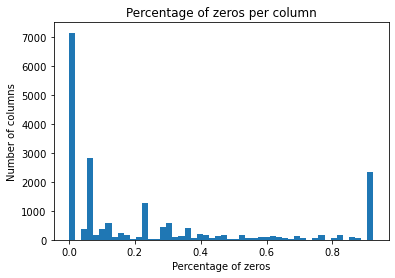

AADACL3         0.825413
AARS1           0.923843
ABHD14A-ACY1    0.923843
ABHD18          0.923843
ABITRAM         0.923843
                  ...   
ZNF875          0.923843
ZNRD2           0.923843
ZSCAN5C         0.915016
ZSWIM9          0.923843
ZUP1            0.923843
Length: 2746, dtype: float64


In [25]:
# Plot percentage of samples == 0  per columns
percentage_zeros = (train_augmented == 0).mean()
percentage_zeros.plot(kind='hist', bins=50)
plt.xlabel('Percentage of zeros')
plt.ylabel('Number of columns')
plt.title('Percentage of zeros per column')
plt.show()
# Print all columns with more than 90% zeros
print(percentage_zeros[percentage_zeros > 0.8])

In [26]:
train_augmented.shape


(9743, 19907)

In [27]:
train.shape

(742, 19907)

In [28]:
# Split the data
new_X_train, new_X_test = train_test_split(train_augmented, test_size=0.2, random_state=42)
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(train, train_target, test_size=0.2, random_state=42)

In [29]:
# Define the autoencoder architecture
input_dim = new_X_train.shape[1]
encoding_dim = 100

# Set the encoding dimension
input_layer = keras.layers.Input(shape=(input_dim,))
encoder = keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
decoder = keras.layers.Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the autoencoder architecture
autoencoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 19907)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │     1,990,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 19907)          │     2,010,607 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001,407 (15.26 MB)

 Trainable params: 4,001,407 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
autoencoder.fit(new_X_train, new_X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(new_X_test, new_X_test))

Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 0.7091 - val_loss: 0.6008
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.5826 - val_loss: 0.5818
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.5752 - val_loss: 0.5749
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.5571 - val_loss: 0.5717
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.5547 - val_loss: 0.5701
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 0.5607 - val_loss: 0.5691
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.5529 - val_loss: 0.5686
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 0.5501 - val_loss: 0.5682
Epoch 9/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.5543 - val_loss: 0.5681
Epoch 10/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.5504 - val_loss: 0.5679


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Encoded Features Shape (Train): (593, 100)
Encoded Features Shape (Test): (149, 100)


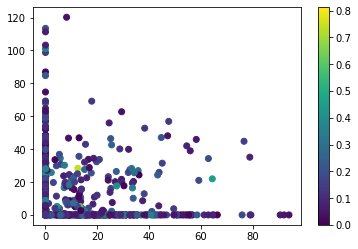

In [31]:
# Use encoder part of the autoencoder for feature selection
encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)
encoded_features_train = encoder.predict(X_train)
encoded_features_test = encoder.predict(X_test)

# Display the shape of extracted features
print("Encoded Features Shape (Train):", encoded_features_train.shape)
print("Encoded Features Shape (Test):", encoded_features_test.shape)
# plot all encoded features
plt.scatter(encoded_features_train[:,0], encoded_features_train[:,1], c = y_train['AAC'], cmap='viridis')
plt.colorbar()
plt.show()

In [32]:
# Import a predictive model for regression (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit a linear regression model using the selected features
encoded_model = LinearRegression()
encoded_model.fit(encoded_features_train, y_train)

# Make predictions on the test set
y_pred_encoded = encoded_model.predict(encoded_features_test)

# Calculate regression metrics
mse_encoded = mean_squared_error(y_test, y_pred_encoded)
r2_encoded = r2_score(y_test, y_pred_encoded)
print("--- Encoded Features ---")
print("Mean Squared Error (MSE):", mse_encoded)
print("R-squared (R²):", r2_encoded)

# Compare with non encoded features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("--- Non Encoded Features ---")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)    

--- Encoded Features ---
Mean Squared Error (MSE): 0.006234432528721898
R-squared (R²): 0.16719661946166875
--- Non Encoded Features ---
Mean Squared Error (MSE): 0.006525344875489466
R-squared (R²): 0.12833618032591332
